<a href="https://colab.research.google.com/github/TrunnMosby/Time-Series-Forecasting-Using-FBprophet/blob/main/FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
train=pd.read_csv('/content/GOOG (2).csv')

In [ ]:
from fbprophet import Prophet

In [ ]:
train=train.reset_index()[['Date','Open','High','Low','Close','Volume']].rename({'Date':'ds','Close':'y'},axis='columns')

In [ ]:
train['ds']=pd.to_datetime(train['ds'])

In [ ]:

New_month=[]
for i in pd.DatetimeIndex(train['ds']).day:
  if(i>5):
    New_month.append(0)
  else:
    New_month.append(1)

In [ ]:
New_year=[]
for i,j in zip(pd.DatetimeIndex(train['ds']).day,pd.DatetimeIndex(train['ds']).month):
  if(i==31 and j==12):
    New_year.append(1)
    
  elif(i>=1and i<5 and j==1):
    New_year.append(1)

  else:
    New_year.append(0)
  
    

In [ ]:
Weekend=[]
for i in train['ds'].dt.day_name() :
  if(i=='Sunday'):
    print(i)


In [ ]:
train['New_year']=New_year
train['New_month']=New_month

In [ ]:
train

,ds,Open,High,Low,y,Volume,New_year,New_month
0,2005-01-03,98.331429,101.439781,97.365051,100.976517,31807000,1,1
1,2005-01-04,100.323959,101.086105,96.378746,96.886841,27614900,1,1
2,2005-01-05,96.363808,98.082367,95.756081,96.393692,16534800,0,1
3,2005-01-06,97.175758,97.584229,93.509506,93.922951,20851900,0,0
4,2005-01-07,94.964050,96.762314,94.037521,96.563057,19398200,0,0
...,...,...,...,...,...,...,...,...
4032,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,2050600,0,0
4033,2021-01-11,1786.069946,1794.314941,1760.520020,1766.719971,1209700,0,0
4034,2021-01-12,1753.920044,1778.040039,1725.310059,1746.550049,1357700,0,0
4035,2021-01-13,1738.579956,1765.035034,1738.010010,1754.400024,1094100,0,0


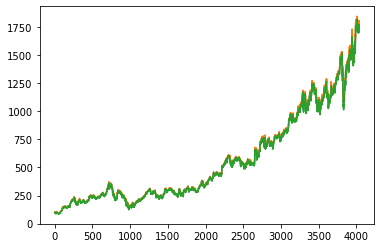

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train['y'])
plt.plot(train['High'])
plt.plot(train['Low'])

In [ ]:
train[:3750]

,ds,Open,High,Low,y,Volume,New_year,New_month
0,2005-01-03,98.331429,101.439781,97.365051,100.976517,31807000,1,1
1,2005-01-04,100.323959,101.086105,96.378746,96.886841,27614900,1,1
2,2005-01-05,96.363808,98.082367,95.756081,96.393692,16534800,0,1
3,2005-01-06,97.175758,97.584229,93.509506,93.922951,20851900,0,0
4,2005-01-07,94.964050,96.762314,94.037521,96.563057,19398200,0,0
...,...,...,...,...,...,...,...,...
3745,2019-11-18,1332.219971,1335.529053,1317.500000,1320.699951,1487400,0,0
3746,2019-11-19,1327.699951,1327.699951,1312.800049,1315.459961,1269200,0,0
3747,2019-11-20,1311.739990,1315.000000,1291.150024,1303.050049,1308600,0,0
3748,2019-11-21,1301.479980,1312.589966,1293.000000,1301.349976,995500,0,0


In [ ]:
x_train=train.iloc[:3750]
x_test=train.iloc[3750:3780]
X=x_train[['ds','y','New_year','New_month']]
X_test=x_test[['y']]

In [ ]:
X

,ds,y,New_year,New_month
0,2005-01-03,100.976517,1,1
1,2005-01-04,96.886841,1,1
2,2005-01-05,96.393692,0,1
3,2005-01-06,93.922951,0,0
4,2005-01-07,96.563057,0,0
...,...,...,...,...
3745,2019-11-18,1320.699951,0,0
3746,2019-11-19,1315.459961,0,0
3747,2019-11-20,1303.050049,0,0
3748,2019-11-21,1301.349976,0,0


In [ ]:
m=Prophet(changepoint_prior_scale=3,holidays_prior_scale=0.001,changepoint_range=1,n_changepoints=50)
m.add_country_holidays(country_name='IN')
m.add_regressor('New_year')
m.add_regressor('New_month')



In [ ]:

m.fit(X)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



In [ ]:
future=m.make_future_dataframe(periods=30)

In [ ]:
data=pd.DataFrame({'ds':future['ds'],'New_year':train['New_year'].iloc[:3780],'New_month':train['New_month'].iloc[:3780]})

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



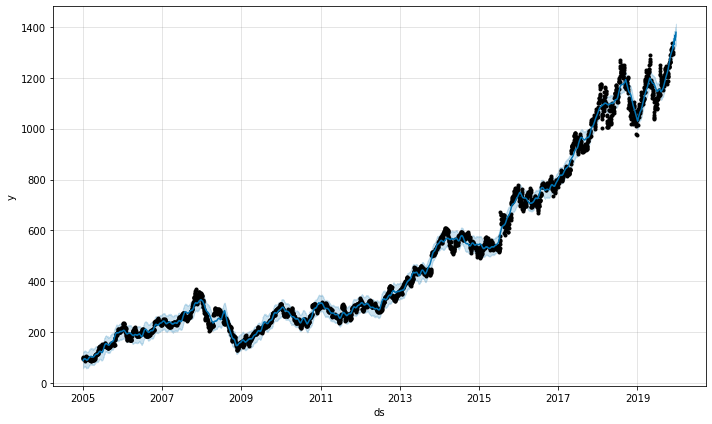

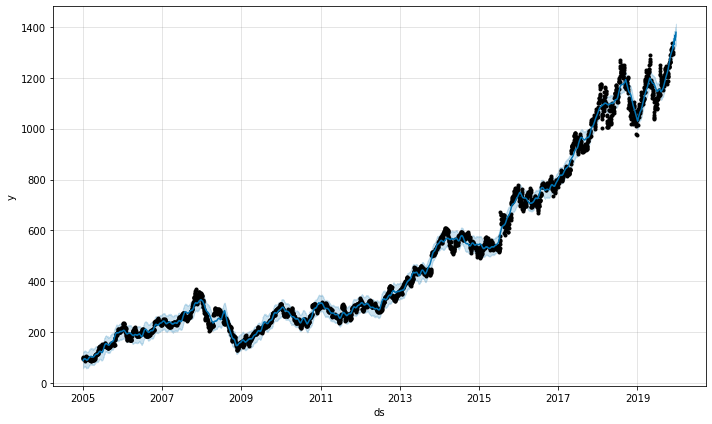

In [ ]:
forecast=m.predict(data)

m.plot(forecast)

In [ ]:
df=pd.DataFrame({'Close':x_test['y'],'Predicted':forecast['yhat'].iloc[3750:3780]})

In [ ]:
df

,Close,Predicted
3750,1306.689941,1327.550857
3751,1313.550049,1329.115291
3752,1312.989990,1317.805519
3753,1304.959961,1319.832601
3754,1289.920044,1321.730387
3755,1295.280029,1323.564384
3756,1320.540039,1325.470704
3757,1328.130005,1339.571112
3758,1340.619995,1341.784274
3759,1343.560059,1330.806934


In [ ]:
error=[]
for i,j in zip(df['Close'],df['Predicted']):
  error.append(abs(i-j))


In [ ]:
max(error)

31.81034297215433

In [ ]:
import numpy as np

(np.mean((error)))


12.335865709379194

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
error=np.sqrt(mean_squared_error(df['Close'],df['Predicted']))
error

15.1508811346418

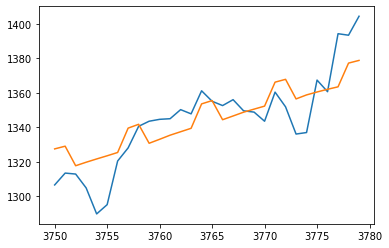

In [ ]:
 plt.plot(df['Close'])
 plt.plot(df['Predicted'])

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.6/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



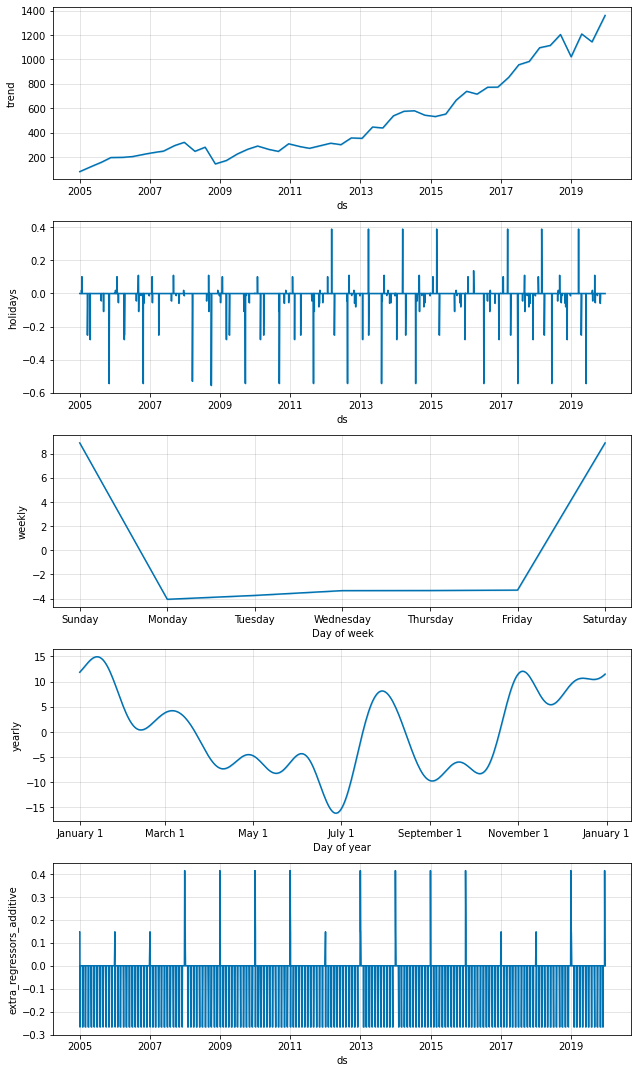

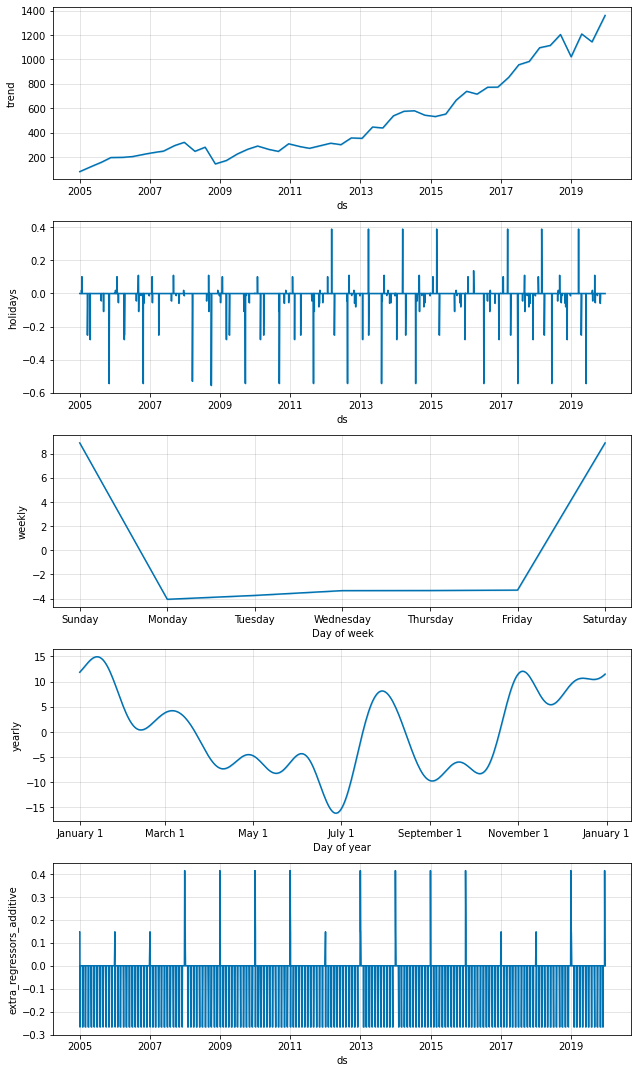

In [ ]:
m.plot_components(forecast)